# Multi Indexig and `Groupby` in Pandas

MultiIndixing is useful when we are doing groupby and aggregation. Let's start with an emaple. In the Kaggle Bike Sharing competition, we have number of customers (registered, casual, total) versus time and date (hour, weekday, month, year). 

### Loading the data

In [540]:
# Panas is used for DataFrame
import pandas as pd

# Used for display dataframes as html tables
from IPython.display import display

# name of the columns of target variables
target_var = ['casual', 'registered', 'tot']

#Load train data
data = pd.read_csv('data/train_prep_orig.csv')
data.head()


,temp,atemp,humidity,windspeed,year,season,month,weekday,hour,workingday,holiday,weather,casual,registered,tot
0,9.84,14.395,81,0,2011,1,1,5,0,0,0,1,3,13,16
1,9.02,13.635,80,0,2011,1,1,5,1,0,0,1,8,32,40
2,9.02,13.635,80,0,2011,1,1,5,2,0,0,1,5,27,32
3,9.84,14.395,75,0,2011,1,1,5,3,0,0,1,3,10,13
4,9.84,14.395,75,0,2011,1,1,5,4,0,0,1,0,1,1


`weekday` starts from Monday (0) to Sunday (6) and `year` is either 2011 or 2012. We would like to sum the number of `casual`, `registered` and `tot`al customers for each weekday. So, first we group the data by `year` and `weekday` and sum the values in each group. We use DataFrame.groupby([col_name_1,col_name_2, ...]). The order of col_name_i determines the order of grouping. 

### Grouping by ['`weekday`','`year`']

we can use both `.sum()` and `.agg('sums)` methods. The main difference is that is we want to calculate a few other aggregations such as `count` and `mean` and have them all in one data frame, it is better to use `.agg(['sum','mean','count'])`.


In [541]:

sum_weekday_year = data.groupby(['weekday','year']).sum()[target_var]
display(sum_weekday_year)

sum_weekday_year = data.groupby(['weekday','year']).agg('sum')[target_var]
display(sum_weekday_year)

sum_mean_count_weekday_year = data.groupby(['weekday','year']).agg(['sum','mean','count'])[target_var]
display(sum_mean_count_weekday_year)

casual  registered     tot
weekday year                            
0       2011   21044       94772  115816
        2012   25244      154236  179480
1       2011   14536       97312  111848
        2012   20829      159308  180137
2       2011   11586       86507   98093
        2012   23345      170788  194133
3       2011   13419       94999  108418
        2012   23864      174119  197983
4       2011   19147      100071  119218
        2012   28255      155031  183286
5       2011   38371       78727  117098
        2012   62411      132009  194420
6       2011   37714       73774  111488
        2012   52370      121688  174058

casual  registered     tot
weekday year                            
0       2011   21044       94772  115816
        2012   25244      154236  179480
1       2011   14536       97312  111848
        2012   20829      159308  180137
2       2011   11586       86507   98093
        2012   23345      170788  194133
3       2011   13419       94999  108418
        2012   23864      174119  197983
4       2011   19147      100071  119218
        2012   28255      155031  183286
5       2011   38371       78727  117098
        2012   62411      132009  194420
6       2011   37714       73774  111488
        2012   52370      121688  174058

casual                  registered                       tot  \
                sum       mean count        sum        mean count     sum   
weekday year                                                                
0       2011  21044  27.616798   762      94772  124.372703   762  115816   
        2012  25244  31.994930   789     154236  195.482890   789  179480   
1       2011  14536  18.804657   773      97312  125.888745   773  111848   
        2012  20829  27.191906   766     159308  207.973890   766  180137   
2       2011  11586  15.244737   760      86507  113.825000   760   98093   
        2012  23345  29.513274   791     170788  215.914033   791  194133   
3       2011  13419  17.610236   762      94999  124.670604   762  108418   
        2012  23864  30.169406   791     174119  220.125158   791  197983   
4       2011  19147  24.391083   785     100071  127.478981   785  119218   
        2012  28255  37.977151   744     155031  208.375000   744  183286   
5       2011  38371  47.023284   816      78727   96.479167   816  117098   
        2012  62411  81.264323   768     132009  171.886719   768  194420   
6       2011  37714  49.363874   764      73774   96.562827   764  111488   
        2012  52370  64.257669   815     121688  149.310429   815  174058   

                                
                    mean count  
weekday year                    
0       2011  151.989501   762  
        2012  227.477820   789  
1       2011  144.693402   773  
        2012  235.165796   766  
2       2011  129.069737   760  
        2012  245.427307   791  
3       2011  142.280840   762  
        2012  250.294564   791  
4       2011  151.870064   785  
        2012  246.352151   744  
5       2011  143.502451   816  
        2012  253.151042   768  
6       2011  145.926702   764  
        2012  213.568098   815

We see that for each weekday, the average number of customers in 2012 is more than 2011. This means the business has growth.

Here we play a bot with indecis. For a visual explanation of pandas indexing, one can refer to Jason Wirth's presentation [A Visual Guide To Pandas](https://www.youtube.com/watch?v=9d5-Ti6onew)


In [542]:
print "Selecting the weekdays for 2011"
display(sum_mean_count_weekday_year.tot.xs(2011, level = 1, axis = 0))

print "Selecting the years for Monday"
display(sum_mean_count_weekday_year.tot.xs(0, level = 0, axis = 0))

Selecting the weekdays for 2011


,sum,mean,count
weekday,,,
0,115816,151.989501,762
1,111848,144.693402,773
2,98093,129.069737,760
3,108418,142.280840,762
4,119218,151.870064,785
5,117098,143.502451,816
6,111488,145.926702,764


Selecting the years for Monday


,sum,mean,count
year,,,
2011,115816,151.989501,762
2012,179480,227.477820,789


### Grouping by ['`year`','`month`','`weekday`']

Now, that we saw from 2011 ro 2012, the number of customers per weekday has increased, we would like to learn how does it changes acros different months. 

In [543]:
groupby_year_month_weekday = data.groupby(['year','month','weekday']).agg(['sum','mean','count'])[target_var]
display(groupby_year_month_weekday.head(10))

casual                 registered                    tot  \
                      sum      mean count        sum       mean count   sum   
year month weekday                                                            
2011 1     0          278  3.971429    70       3392  48.457143    70  3670   
           1          160  2.807018    57       3348  58.736842    57  3508   
           2          185  2.720588    68       4227  62.161765    68  4412   
           3          126  2.680851    47       2886  61.404255    47  3012   
           4          202  4.391304    46       2729  59.326087    46  2931   
           5          621  8.625000    72       2571  35.708333    72  3192   
           6          436  6.140845    71       2391  33.676056    71  2827   
     2     0          328  6.833333    48       3297  68.687500    48  3625   
           1          251  3.585714    70       4454  63.628571    70  4705   
           2          343  4.900000    70       4903  70.042857    70  5246   

                                     
                         mean count  
year month weekday                   
2011 1     0        52.428571    70  
           1        61.543860    57  
           2        64.882353    68  
           3        64.085106    47  
           4        63.717391    46  
           5        44.333333    72  
           6        39.816901    71  
     2     0        75.520833    48  
           1        67.214286    70  
           2        74.942857    70

Now, for example, we want to know how the average number of customers on Mondays have changed over the months.

In [544]:
groupby_year_month_weekday.xs(0, level = 'weekday', axis = 0).xs('mean', level = 1, axis = 1)

casual  registered         tot
year month                                   
2011 1       3.971429   48.457143   52.428571
     2       6.833333   68.687500   75.520833
     3      13.108696   72.065217   85.173913
     4      31.802817  107.521127  139.323944
     5      31.722222  144.958333  176.680556
     6      32.000000  167.333333  199.333333
     7      64.291667  138.305556  202.597222
     8      32.638889  146.944444  179.583333
     9      36.859155  140.647887  177.507042
     10     35.513889  148.611111  184.125000
     11     20.166667  157.354167  177.520833
     12      8.833333  137.333333  146.166667
2012 1       7.985915   85.323944   93.309859
     2       6.382979  146.936170  153.319149
     3      28.097222  177.236111  205.333333
     4      46.633803  205.352113  251.985915
     5      28.125000  161.791667  189.916667
     6      38.069444  222.500000  260.569444
     7      41.527778  231.055556  272.583333
     8      50.833333  238.666667  289.500000
     9      57.013889  226.708333  283.722222
     10     33.291667  218.527778  251.819444
     11     26.722222  209.763889  236.486111
     12     15.222222  206.847222  222.069444

In [545]:
groupby_year_month_weekday.xs(0, level = 'weekday', axis = 0).xs('mean', level = 1, axis = 1).unstack(1)

casual                                                        \
month        1         2          3          4          5          6    
year                                                                    
2011   3.971429  6.833333  13.108696  31.802817  31.722222  32.000000   
2012   7.985915  6.382979  28.097222  46.633803  28.125000  38.069444   

                                                      ...             tot  \
month         7          8          9          10     ...              3    
year                                                  ...                   
2011   64.291667  32.638889  36.859155  35.513889     ...       85.173913   
2012   41.527778  50.833333  57.013889  33.291667     ...      205.333333   

                                                                               \
month          4           5           6           7           8           9    
year                                                                            
2011   139.323944  176.680556  199.333333  202.597222  179.583333  177.507042   
2012   251.985915  189.916667  260.569444  272.583333  289.500000  283.722222   

                                           
month          10          11          12  
year                                       
2011   184.125000  177.520833  146.166667  
2012   251.819444  236.486111  222.069444  

[2 rows x 36 columns]

In [546]:
groupby_year_month_weekday.xs(0, level = 'weekday', axis = 0).xs('mean', level = 1, axis = 1).unstack(0)

casual             registered                     tot            
year        2011       2012        2011        2012        2011        2012
month                                                                      
1       3.971429   7.985915   48.457143   85.323944   52.428571   93.309859
2       6.833333   6.382979   68.687500  146.936170   75.520833  153.319149
3      13.108696  28.097222   72.065217  177.236111   85.173913  205.333333
4      31.802817  46.633803  107.521127  205.352113  139.323944  251.985915
5      31.722222  28.125000  144.958333  161.791667  176.680556  189.916667
6      32.000000  38.069444  167.333333  222.500000  199.333333  260.569444
7      64.291667  41.527778  138.305556  231.055556  202.597222  272.583333
8      32.638889  50.833333  146.944444  238.666667  179.583333  289.500000
9      36.859155  57.013889  140.647887  226.708333  177.507042  283.722222
10     35.513889  33.291667  148.611111  218.527778  184.125000  251.819444
11     20.166667  26.722222  157.354167  209.763889  177.520833  236.486111
12      8.833333  15.222222  137.333333  206.847222  146.166667  222.069444

Now, we try some plotting of data.


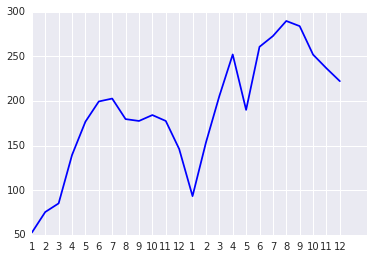

In [547]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

tot_mean_Monday = groupby_year_month_weekday.xs(0, level = 'weekday', axis = 0).xs('mean', level = 1, axis = 1).tot

plt.plot(tot_mean_Monday,"b-")
plt.xticks(range(24), np.arange(1,13).astype("S2").tolist()*2)
plt.show()

Now we plot all weekdays together for `tot`. First we do a simple plot with least complication and later we add legends and tick names for decoration and more information

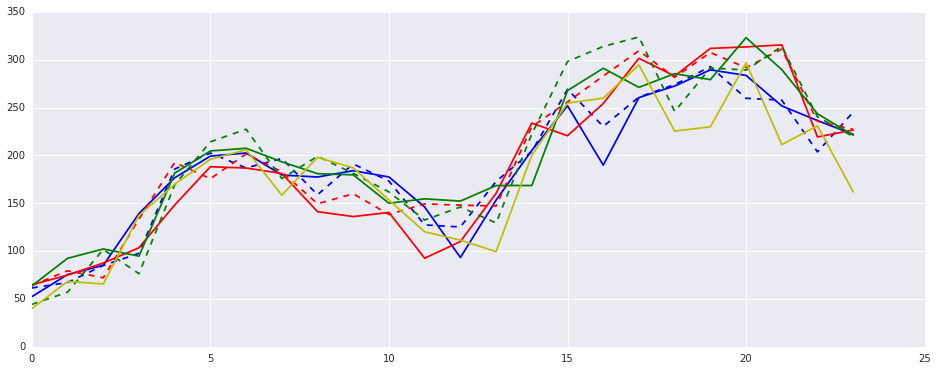

In [548]:
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

colors = ["b-","b--","r-","r--","g-","g--","y"]

for i in range(7):
    tot_mean = groupby_year_month_weekday.xs(i, level = 'weekday', axis = 0).xs('mean', level = 1, axis = 1).tot
    plt.plot(tot_mean,colors[i])

plt.show()    

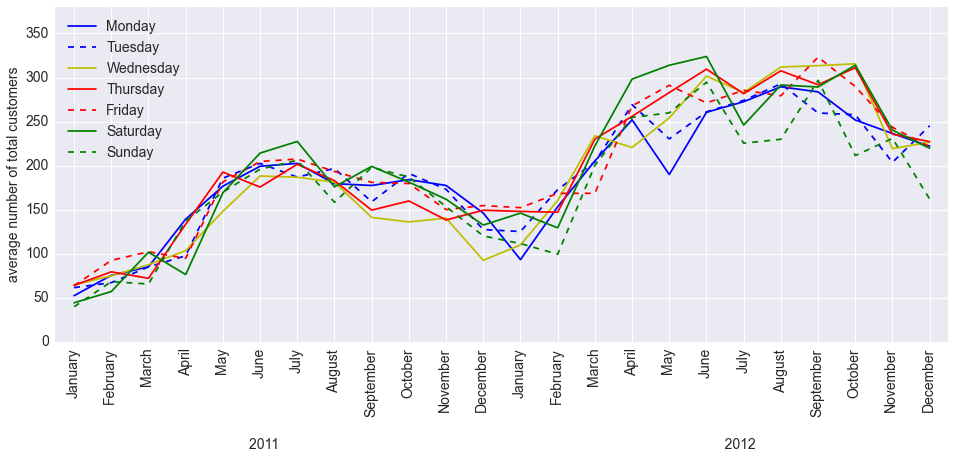

In [549]:
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
weekday_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
colors = ["b-","b--","y","r-","r--","g-","g--"]

for i in range(7):
    tot_mean = groupby_year_month_weekday.xs(i, level = 'weekday', axis = 0).xs('mean', level = 1, axis = 1).tot
    plt.plot(tot_mean,colors[i])

plt.legend(weekday_names,loc='best', fontsize = 14)    


plt.xticks(range(24), months*2,rotation = 90, fontsize = 14)  
plt.yticks(fontsize = 14)
plt.xlabel("\n2011".ljust(120)+"2012", fontsize = 14)
plt.ylabel("average number of total customers", fontsize = 14)
plt.axis((-.5,23.5,0,380))    
plt.show()  

To make the analysis better, we would loke to also plot the monthly average. We plot the `tot` from the follwoing table. 

In [550]:
data.groupby(['year','month']).mean()[target_var]

casual  registered         tot
year month                                   
2011 1       4.658933   49.986079   54.645012
     2       8.466368   65.174888   73.641256
     3      17.735426   69.114350   86.849776
     4      26.876923   84.149451  111.026374
     5      34.791667  140.017544  174.809211
     6      42.982456  153.894737  196.877193
     7      57.335526  146.278509  203.614035
     8      38.552632  144.114035  182.666667
     9      40.421634  134.200883  174.622517
     10     37.712088  137.061538  174.773626
     11     22.269737  133.188596  155.458333
     12     11.138158  123.035088  134.173246
2012 1      11.576159  112.777042  124.353201
     2      12.134066  133.512088  145.646154
     3      37.683516  170.593407  208.276923
     4      60.757709  196.698238  257.455947
     5      55.745614  208.364035  264.109649
     6      63.539474  223.646930  287.186404
     7      54.390351  212.646930  267.037281
     8      62.039474  223.530702  285.570175
     9      60.504386  232.094298  292.598684
     10     45.894737  234.614035  280.508772
     11     33.402198  198.578022  231.980220
     12     21.098684  195.956140  217.054825

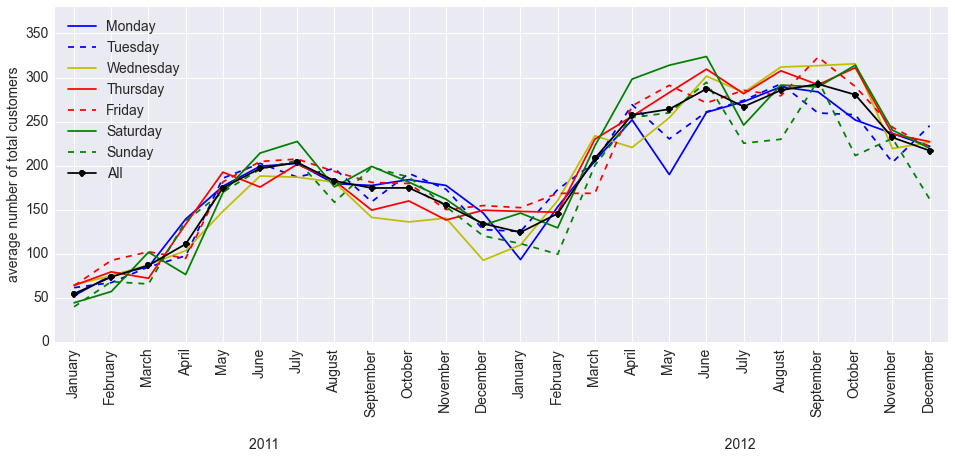

In [551]:
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
weekday_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']


colors = ["b-","b--","y","r-","r--","g-","g--"]

# plotting for each weekday
for i in range(7):
    tot_mean = groupby_year_month_weekday.xs(i, level = 'weekday', axis = 0).xs('mean', level = 1, axis = 1).tot
    plt.plot(tot_mean,colors[i])

# adding the monthly average counting all weekdays
plt.plot(data.groupby(['year','month']).mean()[target_var].tot,"ko-")
    
plt.legend(weekday_names + ['All'], loc = 'best', fontsize = 14)    
plt.xticks(range(24), months*2,rotation = 90, fontsize = 14)  
plt.yticks(fontsize = 14)
plt.xlabel("\n2011".ljust(120)+"2012", fontsize = 14)
plt.ylabel("average number of total customers", fontsize = 14)
plt.axis((-.5,23.5,0,380))    
plt.show()  

Clearly, depending on the month, the weekday with maximum of average number of total customers can vary. The data shows a pattern of the shape $f(x) = a_0 + a_1 x + a_3 \cos\left(2 \pi {x \over 12}\right)$.

So, we may be able to add a few features to the data than includes this seasonality. 

Next, we plot for `casual`, `registered` and `tot`

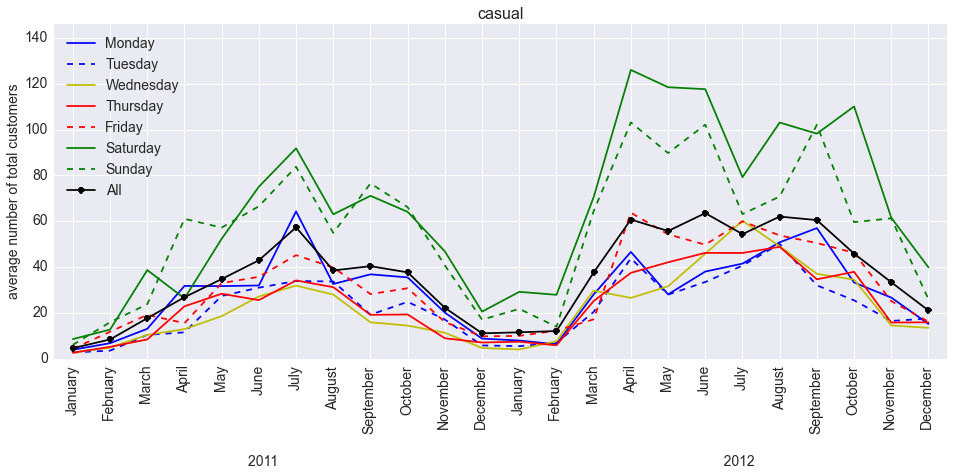

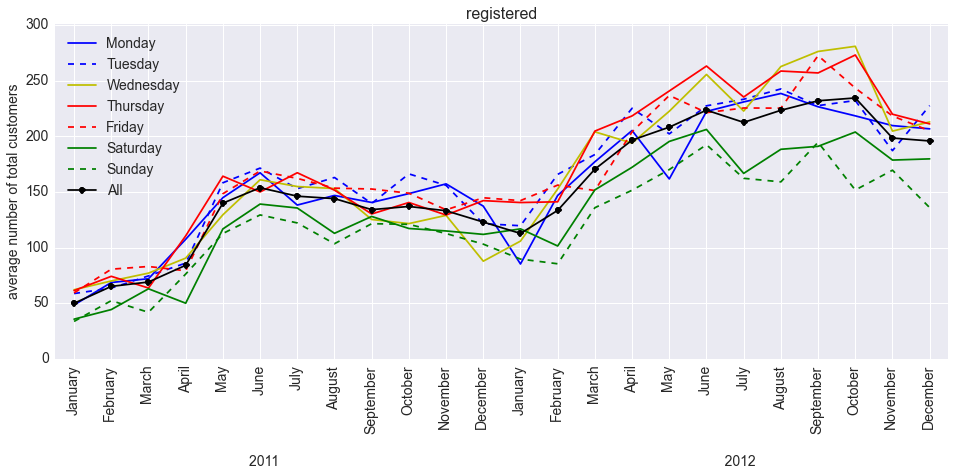

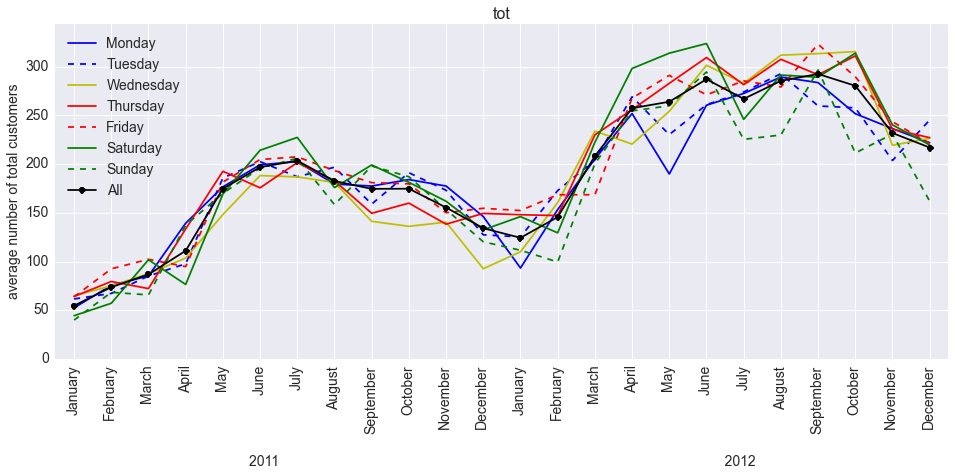

In [552]:

months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
weekday_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

colors = ["b-","b--","y","r-","r--","g-","g--"]

max_y = 0

for target in target_var:
    plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

    
    # plotting for each weekday
    for i in range(7):
        tot_mean = groupby_year_month_weekday.xs(i, level = 'weekday', axis = 0
                                                ).xs('mean', level = 1, axis = 1)[target]
        plt.plot(tot_mean,colors[i])
        max_y = max(max_y,max(tot_mean.tolist()))
    
    # adding the monthly average counting all weekdays
    plt.plot(data.groupby(['year','month']).mean()[target],"ko-")
    
    plt.title(target,fontsize=16)
    plt.legend(weekday_names + ['All'], loc = 'best', fontsize = 14)    
    plt.xticks(range(24), months*2,rotation = 90, fontsize = 14)  
    plt.yticks(fontsize = 14)
    plt.xlabel("\n2011".ljust(120)+"2012", fontsize = 14)
    plt.ylabel("average number of total customers", fontsize = 14)
    plt.axis((-.5,23.5,0,max_y + 20))    
    plt.show()  

Here we see the average of casual customer is over the weekend is **more** than workdays and on the contrary the average of registered customers over the weekedns is **less** than  workdays. This is something that is averaged out in the total number of customers.

So, let's split the hours time into 6 chinks of 4 hours periods:
* 1: [2:00 am, 3:00 am, 4:00 am, 5:00 am]  --> [2,3,4,5]
* 2: [6:00 am, 7:00 am, 8:00 am, 9:00 am]  --> [6,7,8,9]
* 3: [10:00 am, 11:00 am, 12:00 pm, 1:00 pm]  --> [10,11,12,13]
* 4: [2:00 pm, 3:00 pm, 4:00 pm, 5:00 pm]  --> [14,15,16,17]
* 5: [6:00 pm, 7:00 pm, 8:00 pm, 9:00 pm]  --> [18,19,20,21]
* 6: [10:00 pm, 11:00 pm, 12:00 am, 1:00 pm]  --> [22,23,1,4]

In [553]:
import numpy as np

hours = np.array(data.hour)

data['periods']=np.where( (2 <= hours) &  (hours <= 5), 1,
                        np.where( (6 <= hours) &  (hours <= 9), 2,
                                 np.where( (10 <= hours) &  (hours <= 13), 3,
                                          np.where( (14 <= hours) &  (hours <= 17), 4,
                                                  np.where( (18 <= hours) &  (hours <= 23), 5, 6)
                                                  )
                                         )
                                )
                        )
data.head(20)

,temp,atemp,humidity,windspeed,year,season,month,weekday,hour,workingday,holiday,weather,casual,registered,tot,periods
0,9.84,14.395,81,0.0000,2011,1,1,5,0,0,0,1,3,13,16,6
1,9.02,13.635,80,0.0000,2011,1,1,5,1,0,0,1,8,32,40,6
2,9.02,13.635,80,0.0000,2011,1,1,5,2,0,0,1,5,27,32,1
3,9.84,14.395,75,0.0000,2011,1,1,5,3,0,0,1,3,10,13,1
4,9.84,14.395,75,0.0000,2011,1,1,5,4,0,0,1,0,1,1,1
5,9.84,12.880,75,6.0032,2011,1,1,5,5,0,0,2,0,1,1,1
6,9.02,13.635,80,0.0000,2011,1,1,5,6,0,0,1,2,0,2,2
7,8.20,12.880,86,0.0000,2011,1,1,5,7,0,0,1,1,2,3,2
8,9.84,14.395,75,0.0000,2011,1,1,5,8,0,0,1,1,7,8,2
9,13.12,17.425,76,0.0000,2011,1,1,5,9,0,0,1,8,6,14,2


### Grouping by ['`year`','`month`','`weekday`','`period`']

Now, we would like to learn how does it changes acros different months, weekdays and day periods. We only work with `mean` here .

In [554]:
groupby_year_month_weekday_periods = data.groupby(['year','month','weekday','periods']).mean()[target_var]
display(groupby_year_month_weekday_periods.head(10))

casual  registered         tot
year month weekday periods                                  
2011 1     0       1        0.200000    2.600000    2.800000
                   2        2.666667   66.000000   68.666667
                   3        7.666667   48.833333   56.500000
                   4        8.166667   80.000000   88.166667
                   5        2.722222   54.833333   57.555556
                   6        0.833333    6.833333    7.666667
           1       1        0.000000    3.200000    3.200000
                   2        1.750000  108.500000  110.250000
                   3        5.700000   44.000000   49.700000
                   4        6.000000   76.833333   82.833333

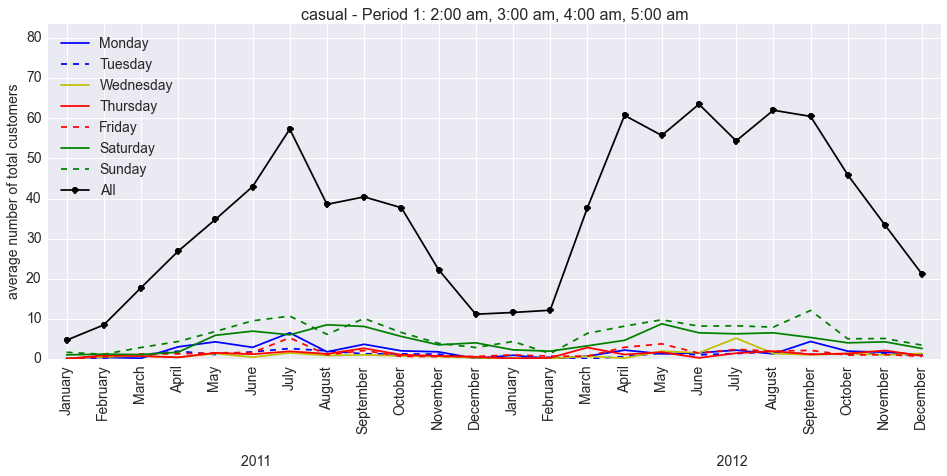

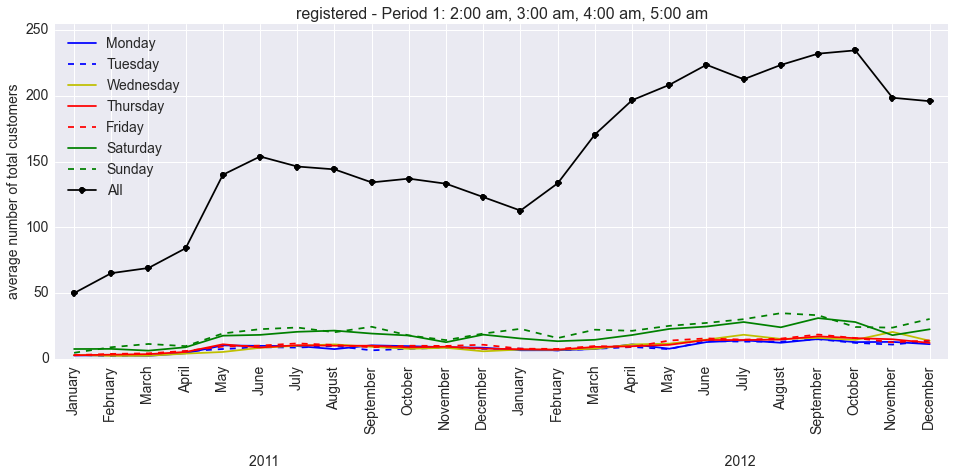

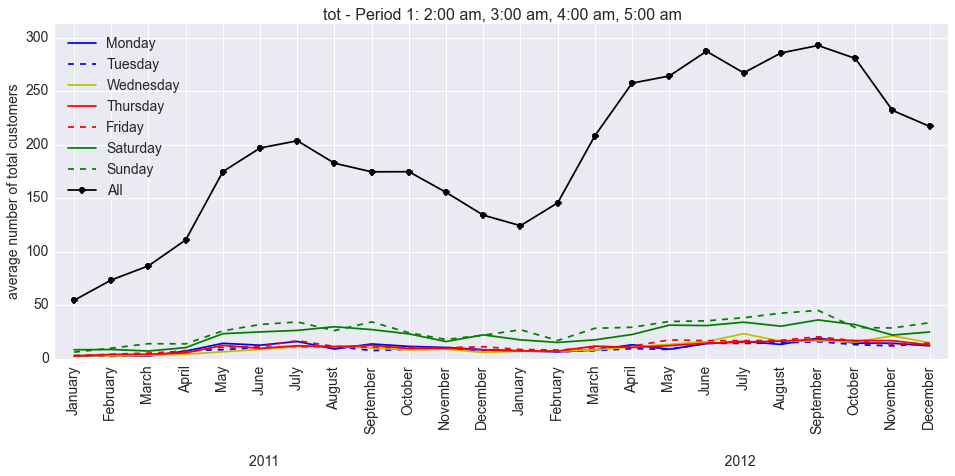

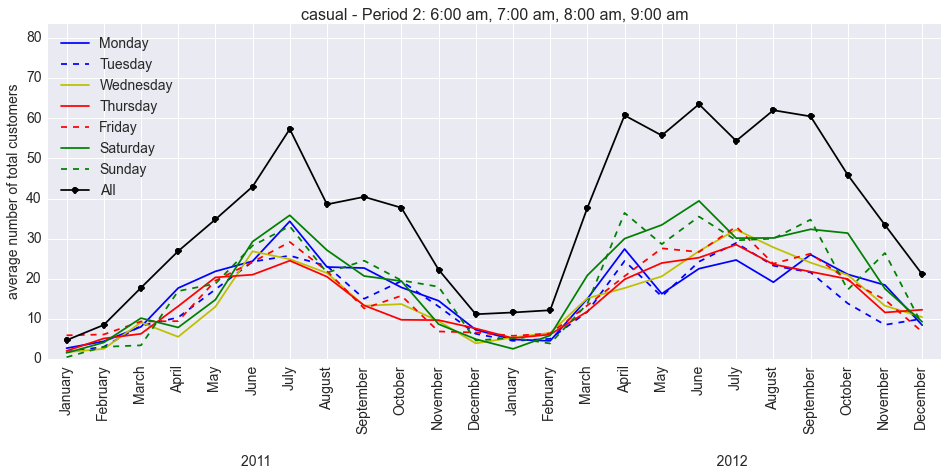

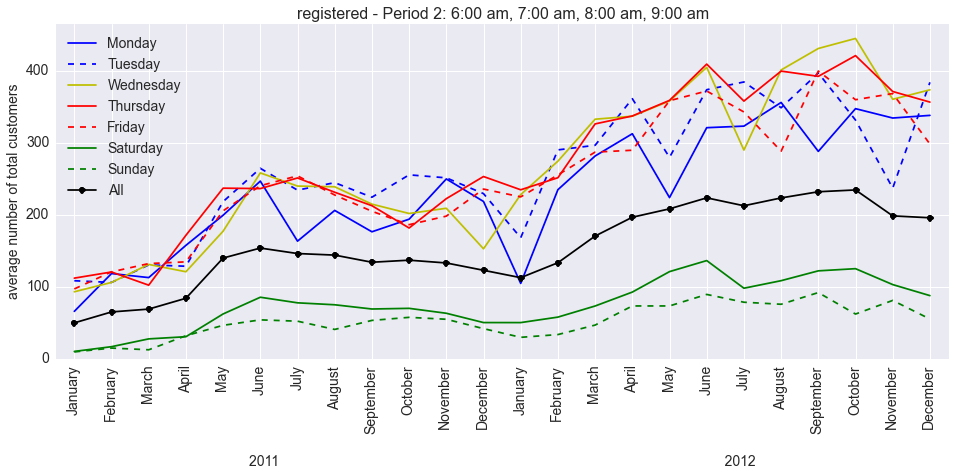

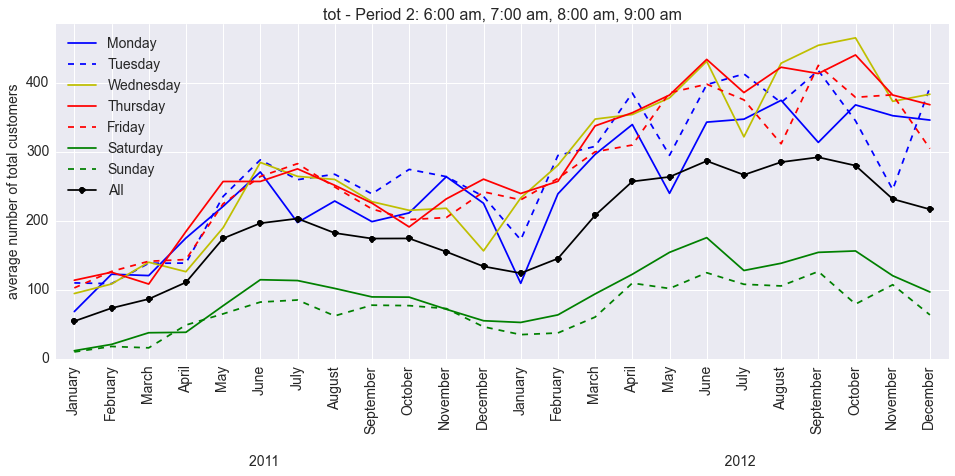

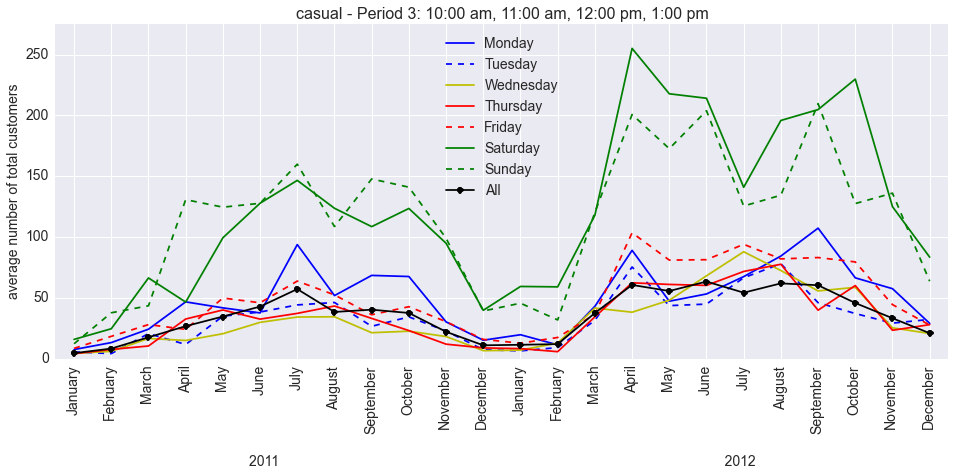

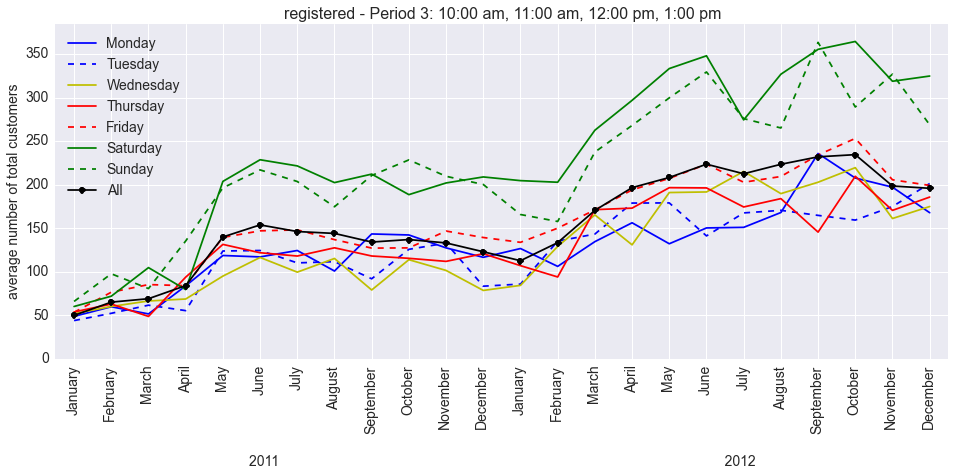

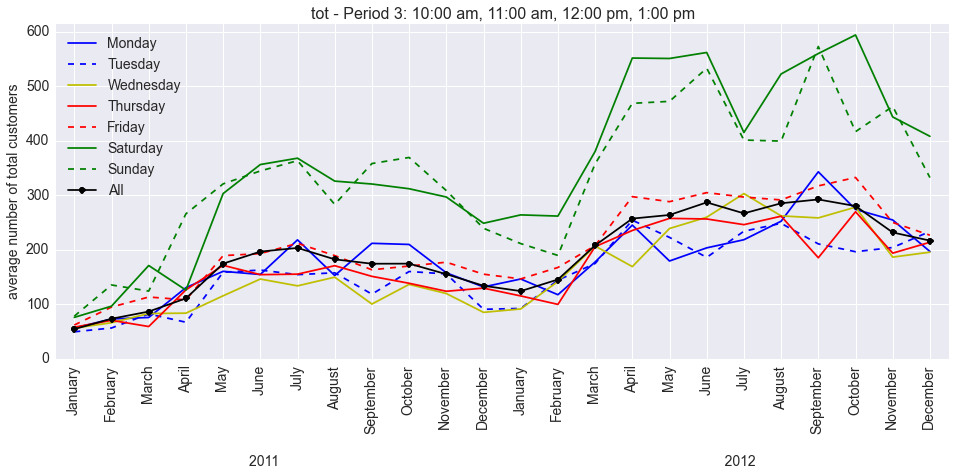

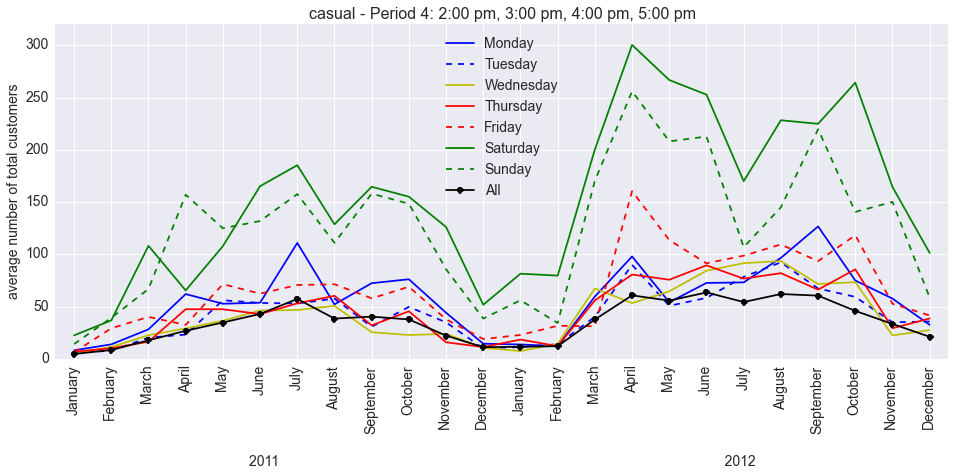

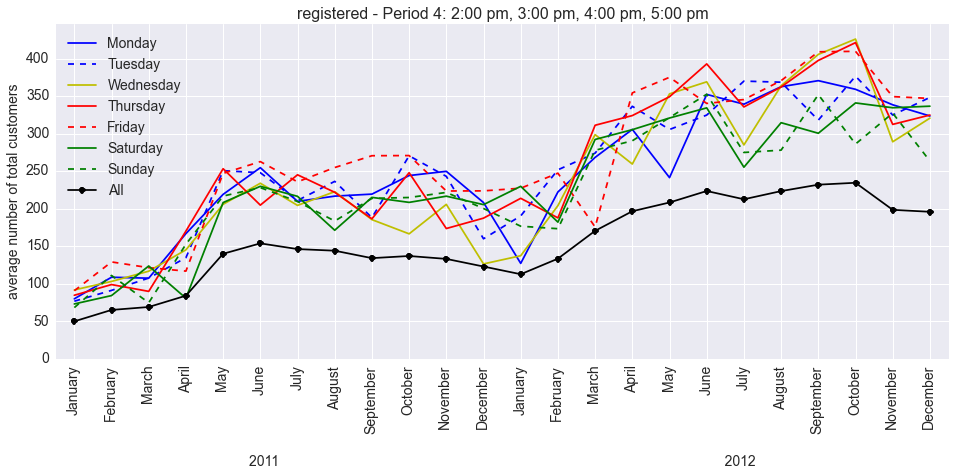

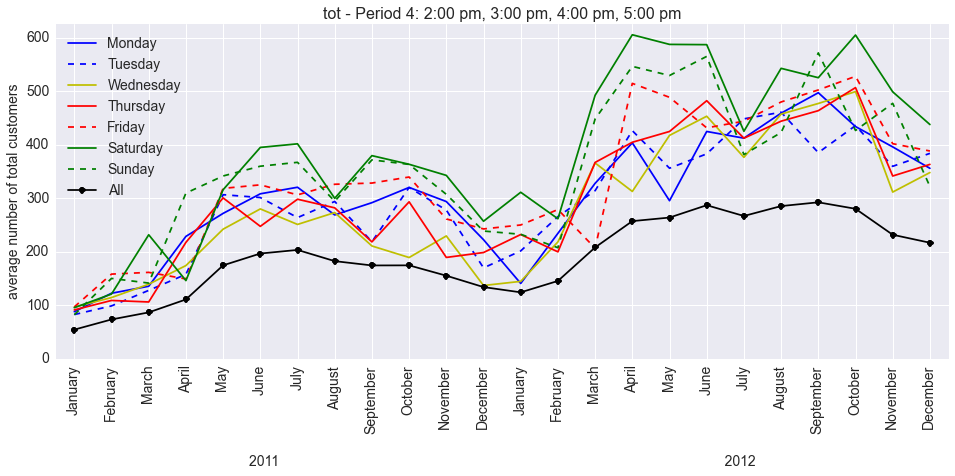

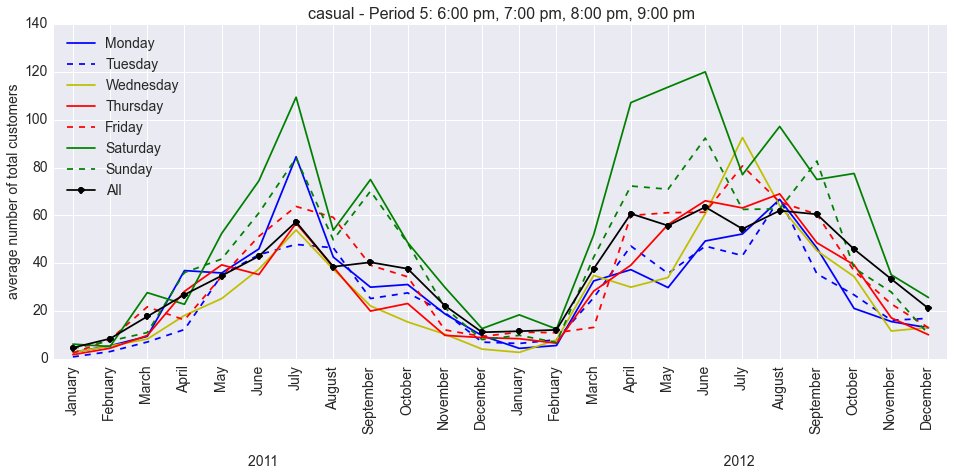

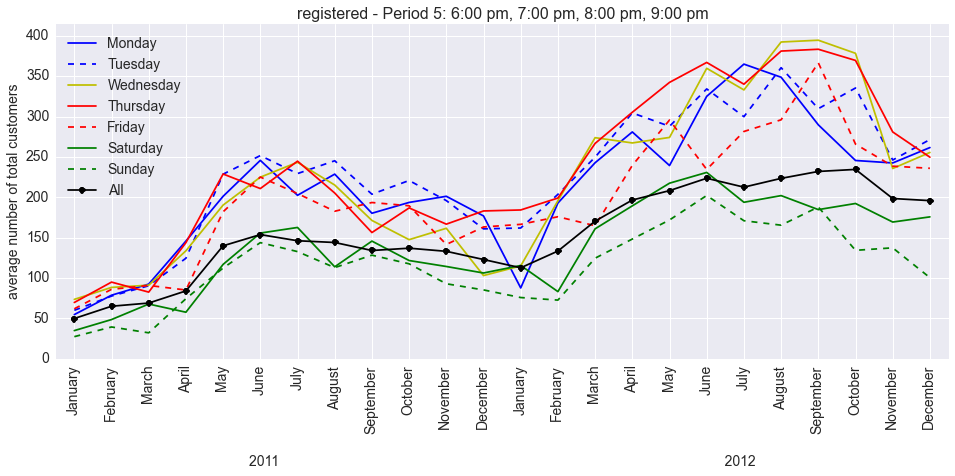

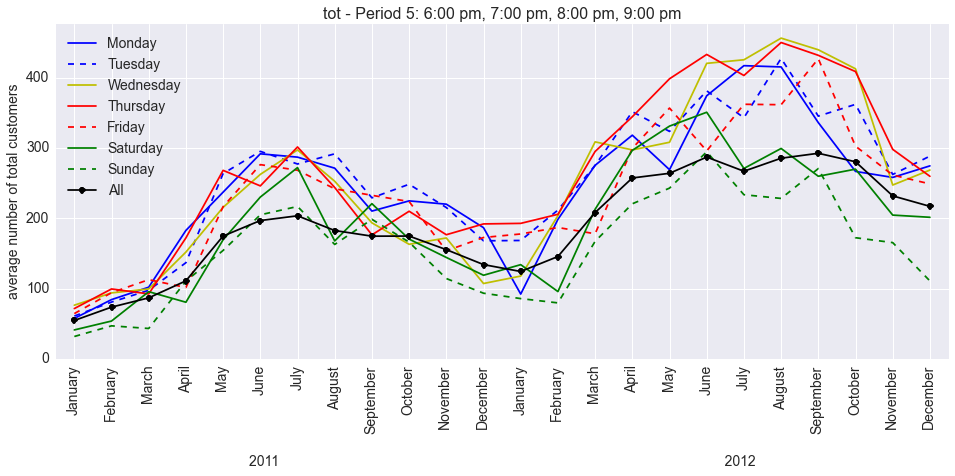

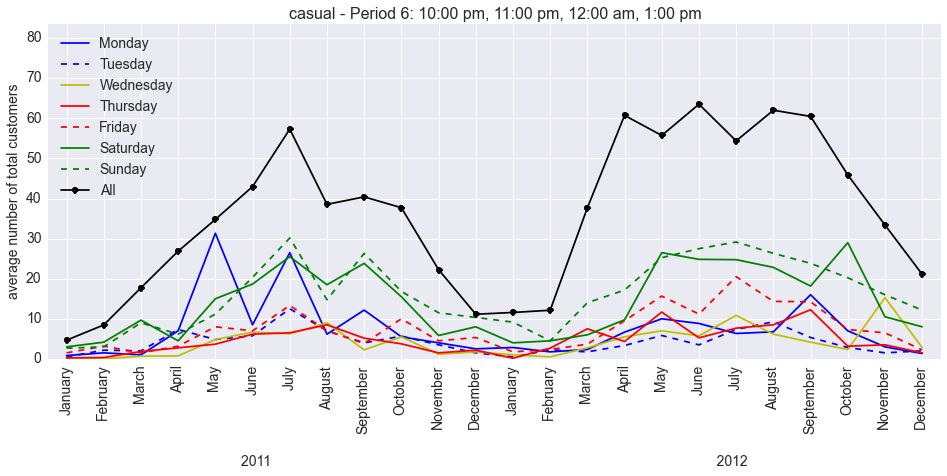

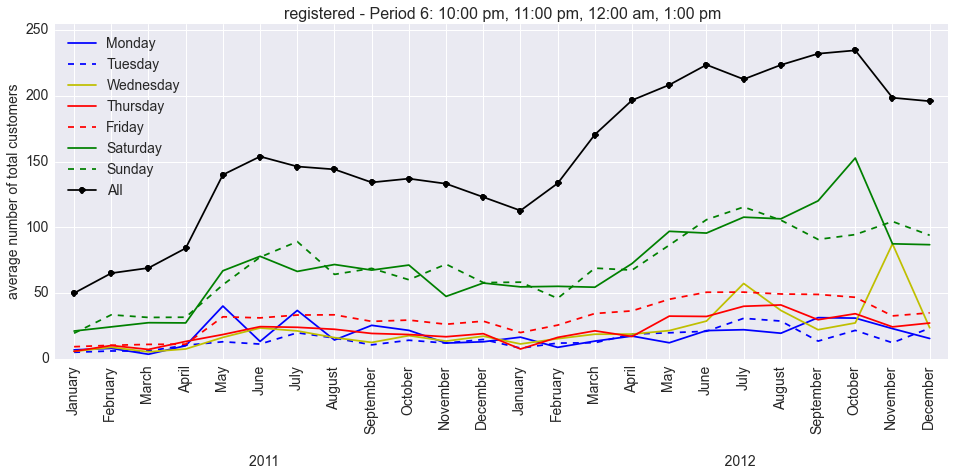

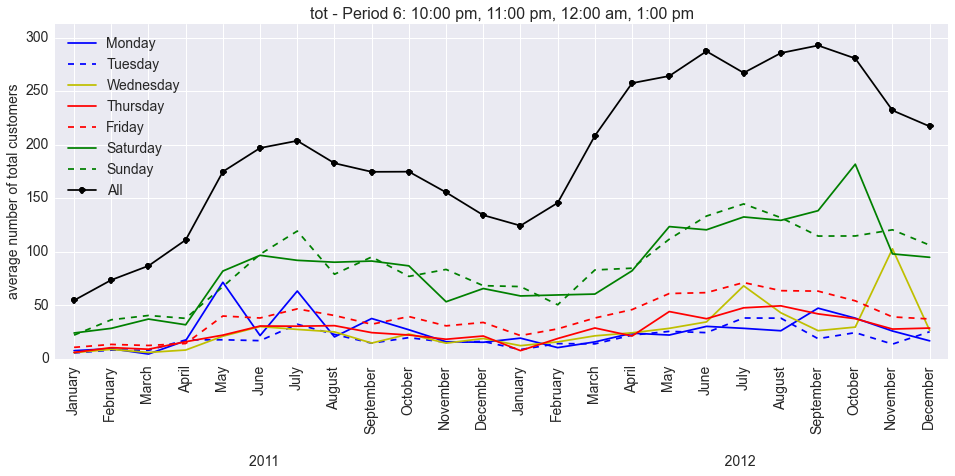

In [555]:
groupby_year_month_weekday_periods


months = ['January','February','March','April','May','June','July',
          'August','September','October','November','December']
weekday_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

colors = ["b-","b--","y","r-","r--","g-","g--"]

periods_itr = range(1,7)

periods_title= ["2:00 am, 3:00 am, 4:00 am, 5:00 am",
                "6:00 am, 7:00 am, 8:00 am, 9:00 am",
                "10:00 am, 11:00 am, 12:00 pm, 1:00 pm",
                "2:00 pm, 3:00 pm, 4:00 pm, 5:00 pm",
                "6:00 pm, 7:00 pm, 8:00 pm, 9:00 pm",
                "10:00 pm, 11:00 pm, 12:00 am, 1:00 pm"]

max_y = 0

for itr in periods_itr:
  for target in target_var:
    max_y = 0
    plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
    
    # plotting for each weekday
    for i in range(7):
        tot_mean = groupby_year_month_weekday_periods.xs(i, level = 'weekday', axis = 0
                                                        ).xs(itr, level = 'periods', axis = 0)[target]
        plt.plot(tot_mean,colors[i])
        max_y = max(max_y,max(tot_mean.tolist()))
    
    # adding the monthly average counting all weekdays
    plt.plot(data.groupby(['year','month']).mean()[target],"ko-")
    
    max_y = max(max_y, max(data.groupby(['year','month']).mean()[target]) )
    plt.title(target + " - Period "+ str(itr) + ": " + periods_title[itr-1],fontsize=16)
    plt.legend(weekday_names + ['All'], loc = 'best', fontsize = 14)    
    plt.xticks(range(24), months*2,rotation = 90, fontsize = 14)  
    plt.yticks(fontsize = 14)
    plt.xlabel("\n2011".ljust(120)+"2012", fontsize = 14)
    plt.ylabel("average number of total customers", fontsize = 14)
    plt.axis((-.5,23.5,0,max_y + 20))    
    plt.show()  